<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C2_Graficos_Estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boxplot

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd         
from scipy.stats import skew, kurtosis

In [47]:
df_melbourne= pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto melbourne_housing-clean.csv', index_col=0)  

In [48]:
df_melbourne.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


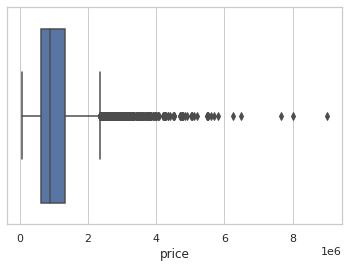

In [49]:
sns.set(style='whitegrid')
sns.boxplot(x=df_melbourne['price'])

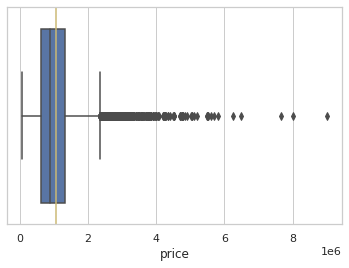

In [50]:
sns.set(style='whitegrid')
sns.boxplot(x=df_melbourne['price'])
plt.axvline(df_melbourne['price'].mean(), c='y')

#Score de Rango Intercuarilico o iqs-socre

In [22]:
iqr =df_melbourne['price'].quantile(0.75) -df_melbourne['price'].quantile(0.25)
filtro_inferior =df_melbourne['price']> df_melbourne['price'].quantile(0.25)-(iqr*1.5)
filtro_superior= df_melbourne['price']< df_melbourne['price'].quantile(0.75)+(iqr*1.5)
df_filtrado = df_melbourne[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


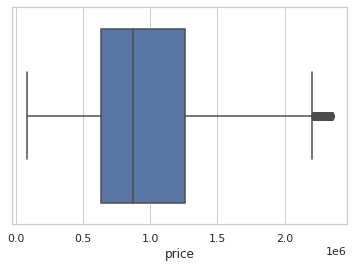

In [23]:
sns.boxplot(df_filtrado['price'])

#Tablas de Freceuncia


In [27]:
prices= df_melbourne['price']
prices.max() - prices.min()

8915000.0

*cut* para segmentr datos
pd.cut(prices,20) toma el rango y crea20 segmetnos de igual tamaño,regresea una serie dónde cada índice clasificado en el segmento que le toca

In [28]:
pd.cut(prices,20)

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64, right]): [(76085.0, 530750.0] < (530750.0, 976500.0] <
                                            (976500.0, 1422250.0] < (1422250.0, 1868000.0] < ... <
                                            (7217000.0, 7662750.0] < (7662750.0, 8108500.0] <
                                            (8108500.0, 8554250.0] < (8554250.0, 9000000.0]]

Usar *groupby* para segmentar

In [33]:
segmentos= pd.cut(prices,20)
df_melbourne['price'].groupby(segmentos).count()

price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

# Histogramas


In [34]:
sns.set(style='white')

##DUDA DE NUEVA VERION
##Duda eje x escala
> Bloc con sangría



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


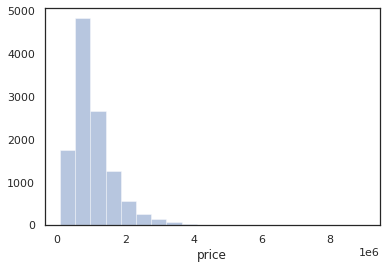

In [37]:
sns.distplot(df_melbourne['price'], kde= False, norm_hist=False,bins=20)


La bandera kde=False evita que se grafique también la densidad de probabilidad (que veremos más adelante).
norm_hist=False sirve para que nuestro eje y indique los conteos de nuestros segmentos.
bins=20 indica el número de segmentos.

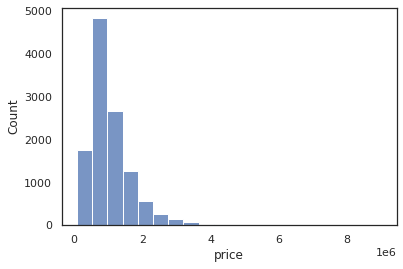

In [39]:
sns.histplot(df_melbourne['price'], kde= False,bins=20)

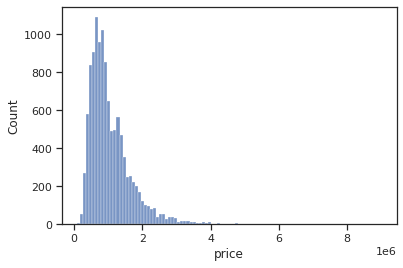

In [42]:
sns.set(style='ticks')
sns.histplot(df_melbourne['price'], kde= False,bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


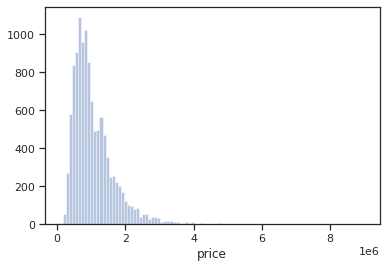

In [45]:
sns.set(style='ticks')
sns.distplot(df_melbourne['price'], kde= False, norm_hist=False,bins=100)

#Describiendo Histogramas

In [53]:
sns.set(style='dark')

#### a) Asimetría (skewness)

La asimetría nos da una medida de la falta de simetría en una distribución (duh). Una distribución es simétrica si se ve igual a la izquierda y derecha del punto central.

- Una asimetría de 0 indica que la simetría de la distribución es perfecta.

- Números positivos indican que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda.

- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

#### b) Curtosis (kurtosis)

La curtosis es una medida de la dispersión de nuestros datos. La curtosis nos dice qué tan escarpada o achatada está nuestra distribución.

- Curtosis de 0 indica que la dispersión de nuestros datos es normal (más adelante aprenderemos exactamente qué significa esto).

- Curtosis positiva indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos, que están más lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).

- Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).


### Distribución Normal (Standard Normal)
La distribución normal es una de las más famosas y más utilizadas. Muchos de los análisis estadísticos que hacemos toman a la distribución normal como un "estándar". Hay algunas medidas que incluso requieren que la distribución sea normal para funcionar. A través de este módulo nos toparemos varias veces con esta distribución y la exploraremos más a profundidad. Por el momento basta saber que la distribución normal tiene una asimetría de 0 y una curtosis de 0 (usando el método default de `scipy` y `pandas`.

Otra cosa interesante es que la distribución normal estándar tiene un promedio de 0, una mediana de 0, una moda de 0 y una desviación estándar de 1. Esto implica que el 68% de los datos están a 1 desviación estándar de la media y el 95% de los datos están a 2 desviaciones estándares de la media.

In [55]:
from numpy.core.fromnumeric import size
normal = np.random.normal(loc=0, scale=5, size=10000)

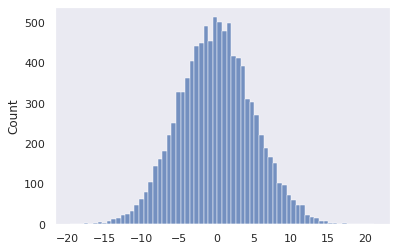

In [62]:
sns.histplot(normal, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


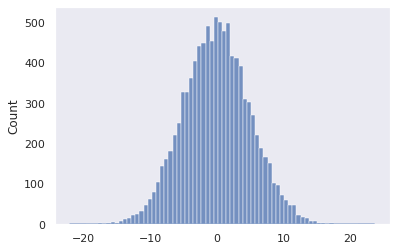

In [63]:
sns.histplot(normal, kde=False)
sns.distplot(normal, norm_hist= False, )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


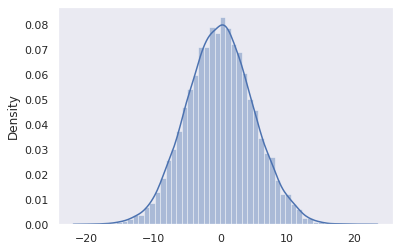

In [61]:
sns.distplot(normal, norm_hist= True)

In [64]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: 0.02947938572022668
Asimetría: 0.030880734791886598


#### Distribuciones de cola corta (short-tailed)
Las distribuciones de cola corta se concentran mucho en el punto central y casi no se extienden hacia los lados. Es raro en realidad encontrar distribuciones de cola corta, pero así se vería una:

In [65]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

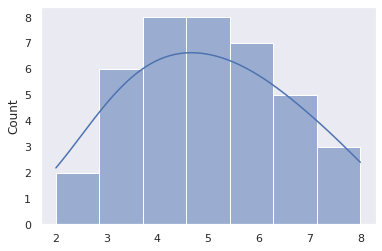

In [72]:
sns.histplot(cola_corta, kde=True, bins=7);

In [67]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


### Distribuciones de cola larga (fat-tailed)

Estas distribuciones se extienden mucho hacia los lados (o hacia uno de los dos lados) a partir del punto central. Muchos fenómenos naturales y sociales tienen distribuciones de cola larga.

In [74]:
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

#DuDA

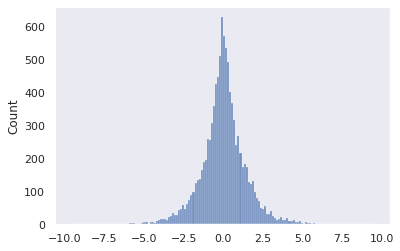

In [78]:
sns.histplot(cola_larga,kde= False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


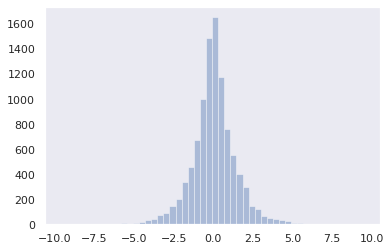

In [77]:
sns.distplot(cola_larga, kde=False, norm_hist=False);

In [79]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 2.9796359044592577
Asimetría: 0.07697894052967398


### Asimetría Positiva (right-skewed)

Las distribuciones con asimetría positiva tienen colas más largas hacia el lado derecho del punto central.

In [80]:
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

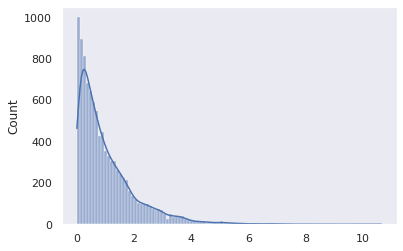

In [82]:
sns.histplot(asimetria_positiva, kde=True)

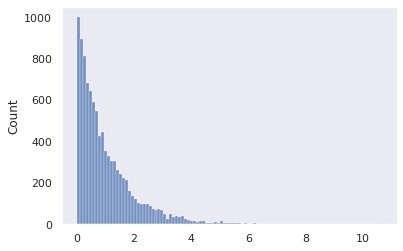

In [83]:
sns.histplot(asimetria_positiva)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


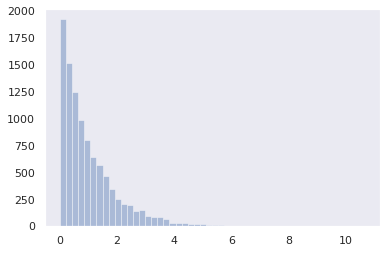

In [85]:
sns.distplot(asimetria_positiva, kde=False, norm_hist= False)

In [86]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 5.885836270865704
Asimetría: 1.9860485512415613


### Asimetría negativa (left-skewed)

Las distribuciones con asimetría negativa tienen colas más largas hacia el lado izquierdo del punto central.

In [87]:
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


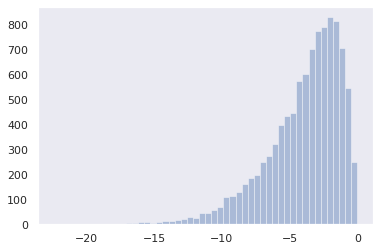

In [88]:
sns.distplot(asimetria_negativa, kde=False, norm_hist=False);

In [ ]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Hay algunas distribuciones que tienen valores muy extremos tanto de curtosis como de asimetría:

In [89]:
cauchy = np.random.standard_cauchy(size=10000)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


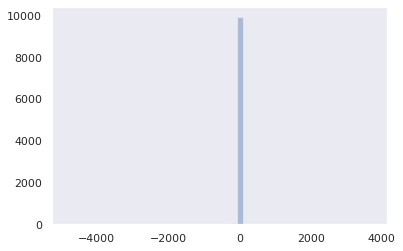

In [90]:
sns.distplot(cauchy, kde=False, norm_hist=False);

In [91]:
print(f'Curtosis: {kurtosis(cauchy)}')
print(f'Asimetría: {skew(cauchy)}')

Curtosis: 3047.535268323341
Asimetría: -14.3443255005585


### Distribución uniforme (uniform distribution)

Una distribución uniforme se genera cuando todos los valores tienen la misma probabilidad (o casi) de suceder. Esto genera una gráfica bastante plana en la parte superior que además tiene una curtosis negativa (porque tiene "colas" muy gruesas):

In [92]:
uniform = np.random.uniform(low=-1, high=0, size=10000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


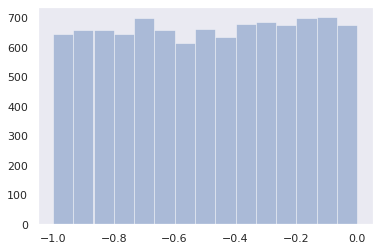

In [93]:
sns.distplot(uniform, bins=15, kde=False, norm_hist=False);

In [94]:
print(f'Curtosis: {kurtosis(uniform)}')
print(f'Asimetría: {skew(uniform)}')

Curtosis: -1.2148200068119555
Asimetría: -0.022728588168469913


### Distribución bimodal y multimodal

Hay veces que no tenemos un solo pico en nuestros datos. Puede suceder que haya dos o más concentraciones de valores en nuestros datos. A esto le llamamos distribuciones bimodales (cuando hay 2 concentraciones) y multimodales (cuando hay más de 2).

Debemos de ser muy cuidadosos al usar las medidas de curtosis y asimetría con este tipo de distribuciones, ya que pueden darnos ideas erróneas de lo que realmente está sucediendo.

In [95]:
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


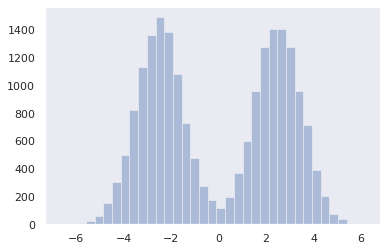

In [96]:
sns.distplot(bimodal, kde=False, norm_hist=False);

In [97]:
print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.4899672594380522
Asimetría: -0.003042088995540624


#Gráficas de Densidad

In [98]:
sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


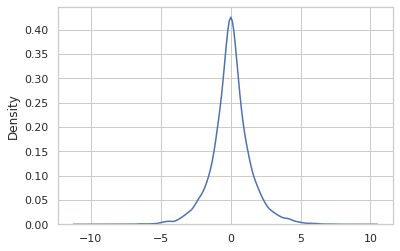

In [99]:
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.distplot(laplace, hist=False);

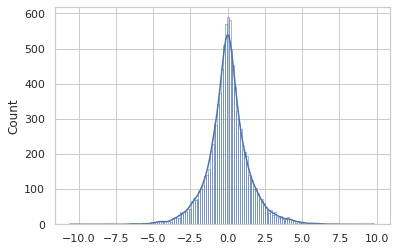

In [102]:
sns.histplot(laplace,kde=True,fill= False,  )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


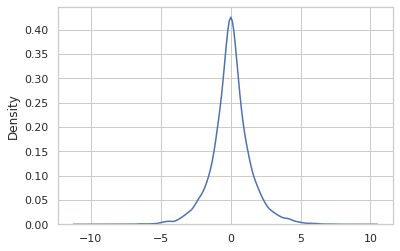

In [104]:
sns.distplot(laplace, hist=False);

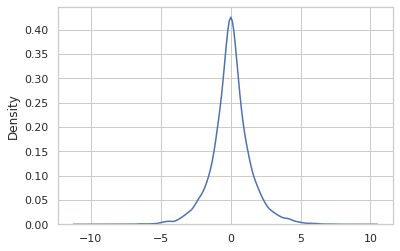

In [105]:
sns.kdeplot(laplace)

In [ ]:
chisquare = np.random.chisquare(4, size=10000)
sns.distplot(chisquare, hist=False)

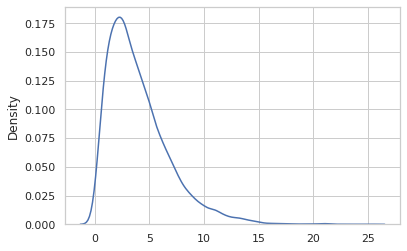

In [108]:
sns.kdeplot(chisquare)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

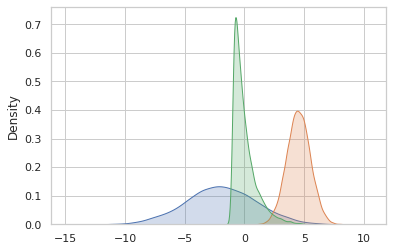

In [109]:
normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.distplot(normal_1, hist = False, kde_kws = {'shade': True})
sns.distplot(normal_2, hist = False, kde_kws = {'shade': True})
sns.distplot(exponential, hist = False, kde_kws = {'shade': True})

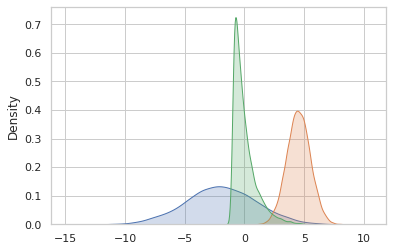

In [113]:
sns.kdeplot(normal_1,fill=True )
sns.kdeplot(normal_2, fill = True)
sns.kdeplot(exponential , fill = True)